# Algoritmo Apriori

In [5]:
import pandas as pd
from apyori import apriori

## Base de dados mercado 1

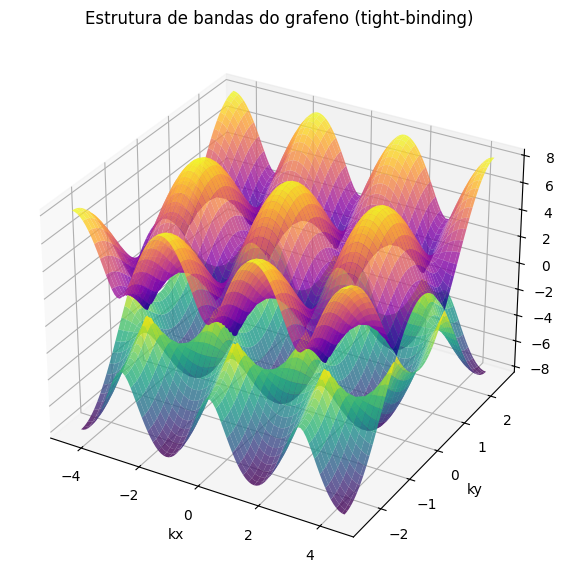

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# Parâmetros da rede do grafeno
a = 1.42  # distância de ligação C-C em angstroms
t = -2.7  # energia de hopping em eV

# Pontos de alta simetria no espaço recíproco
K = (2 * np.pi / (3 * a), 2 * np.pi / (3 * np.sqrt(3) * a))
M = (np.pi / a, 0)
G = (0, 0)

# Malha de pontos kx, ky
kx = np.linspace(-2 * np.pi / a, 2 * np.pi / a, 100)
ky = np.linspace(-2 * np.pi / (np.sqrt(3) * a), 2 * np.pi / (np.sqrt(3) * a), 100)
KX, KY = np.meshgrid(kx, ky)

# Estrutura de bandas do grafeno (tight-binding)
def graphene_band_structure(kx, ky):
    term1 = 2 * np.cos(np.sqrt(3) * ky * a)
    term2 = 4 * np.cos(1.5 * kx * a) * np.cos(np.sqrt(3) * ky * a / 2)
    E = t * np.sqrt(3 + term1 + term2)
    return E, -E

E_plus, E_minus = graphene_band_structure(KX, KY)

# Plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(KX, KY, E_plus, cmap='viridis', alpha=0.8)
ax.plot_surface(KX, KY, E_minus, cmap='plasma', alpha=0.8)
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('Energia (eV)')
ax.set_title('Estrutura de bandas do grafeno (tight-binding)')
plt.show()

In [2]:
!pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\olive\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
from scipy.integrate import odeint


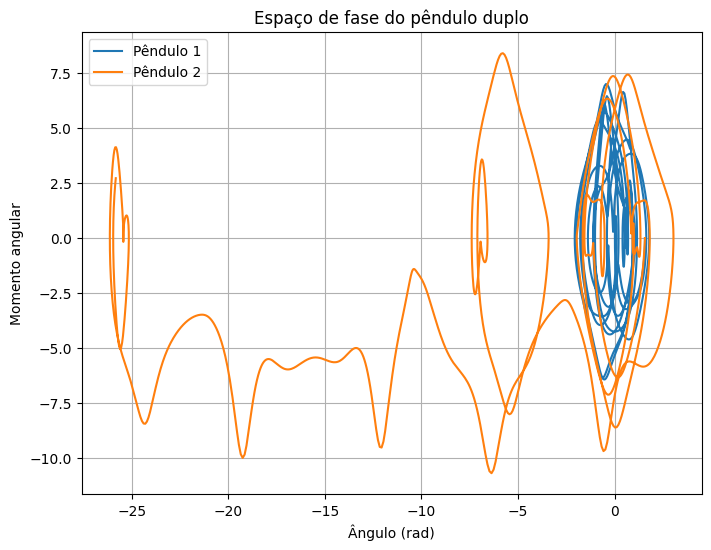

In [4]:
# Espaço de fase do pêndulo duplo

# Parâmetros do pêndulo duplo
m1, m2 = 1.0, 1.0  # massas
l1, l2 = 1.0, 1.0  # comprimentos
g = 9.81           # gravidade

def derivs(state, t):
    theta1, z1, theta2, z2 = state
    delta = theta2 - theta1

    den1 = (m1 + m2) * l1 - m2 * l1 * np.cos(delta) * np.cos(delta)
    den2 = (l2 / l1) * den1

    dtheta1 = z1
    dz1 = ((m2 * l1 * z1 * z1 * np.sin(delta) * np.cos(delta) +
            m2 * g * np.sin(theta2) * np.cos(delta) +
            m2 * l2 * z2 * z2 * np.sin(delta) -
            (m1 + m2) * g * np.sin(theta1)) / den1)
    dtheta2 = z2
    dz2 = ((-m2 * l2 * z2 * z2 * np.sin(delta) * np.cos(delta) +
            (m1 + m2) * g * np.sin(theta1) * np.cos(delta) -
            (m1 + m2) * l1 * z1 * z1 * np.sin(delta) -
            (m1 + m2) * g * np.sin(theta2)) / den2)
    return [dtheta1, dz1, dtheta2, dz2]

# Condições iniciais
state0 = [np.pi / 2, 0, np.pi / 2, 0]
t = np.linspace(0, 20, 2000)

states = odeint(derivs, state0, t)

plt.figure(figsize=(8, 6))
plt.plot(states[:, 0], states[:, 1], label='Pêndulo 1')
plt.plot(states[:, 2], states[:, 3], label='Pêndulo 2')
plt.xlabel('Ângulo (rad)')
plt.ylabel('Momento angular')
plt.title('Espaço de fase do pêndulo duplo')
plt.legend()
plt.grid(True)
plt.show()

## Base de dados mercado 2